# CUDA exercises

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import itertools
%matplotlib inline

from IPython.display import display

In [ ]:
def csv_parse(path, header=False, sep=";"):
    if header:
        df = pd.read_csv(path, sep=sep, names=header)
    else:
        df = pd.read_csv(path, sep=sep)
    #display(df.head())
    return df



In [ ]:
def calcGB_Stride(df):
    return 3*8* df["N"]/df["k"] /1e9

def calcGB_Offset(df):
    return 3*8* (df["N"]-df["k"])/1e9

def transform_to_ms(df, cols):
    return df[cols]*1e3


# Ex6.1 Warps

In [ ]:
df = csv_parse("data/ph_data.csv", header=False)
display(df)

In [ ]:
cols = df.columns
cols

In [ ]:
time_cols = list(filter(lambda x: "time" in x, cols))
labels = list(map(lambda x: x.split("_",1)[-1], time_cols))
time_cols, labels

In [ ]:
speedup_cols = []
for x in ["time_rm_stacked", "time_cm_stacked"]:
    col_name = "speedup_"+x.split("_",1)[-1]
    speedup_cols.append(col_name)
    df[col_name] = df["time_single"] / df[x]
df

In [ ]:
Ns = df["N"].unique()
Ns

In [ ]:
def print_styling():

    plt.rc('figure', figsize=(14,8)) 
    SMALL_SIZE = 15
    MEDIUM_SIZE = 18
    BIGGER_SIZE = 26

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('lines', linewidth=2)

    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
print_styling()

2
4
8
16


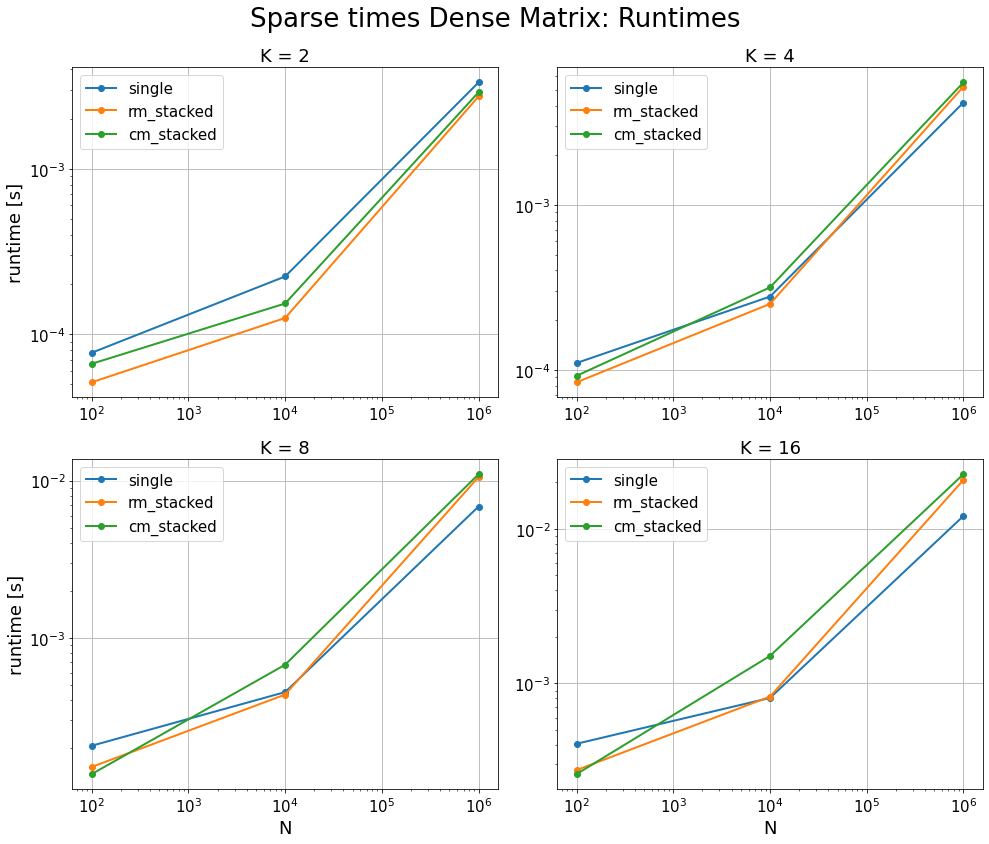

In [57]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,12))

logx, logy = True, True
if (logx and logy):
    plot_format = "loglog"
if (logx and not logy):
    plot_format = "logx"
if (not logx and logy):
    plot_format = "logy"
else:
    plot_format = "linear"

print_styling();
x = "N"
for k,ax in zip(df["K"].unique(), axs.ravel()):
    print(k)
    df[df["K"] == k].plot(x=x, y=time_cols, logx=logx, logy=logy, marker="o", linestyle="-", ax=ax)
    ax.legend(labels)
    ax.grid()
    ax.set_title(f"K = {k}")
    ax.set_xlabel("")

axs[0][0].set_ylabel("runtime [s]")
axs[1][0].set_ylabel("runtime [s]")
axs[1][0].set_xlabel("N")
axs[1][1].set_xlabel("N")
#df.plot(x=x, y=gpu_ref+["time_cpuref"], logx=logx, logy=logy, linestyle="--", ax=ax);



fig.suptitle("Sparse times Dense Matrix: Runtimes")
plt.tight_layout()

fig.savefig("spTd_runtimes.pdf", bbox_inches="tight", pad_inches=0.2)

2
4
8
16


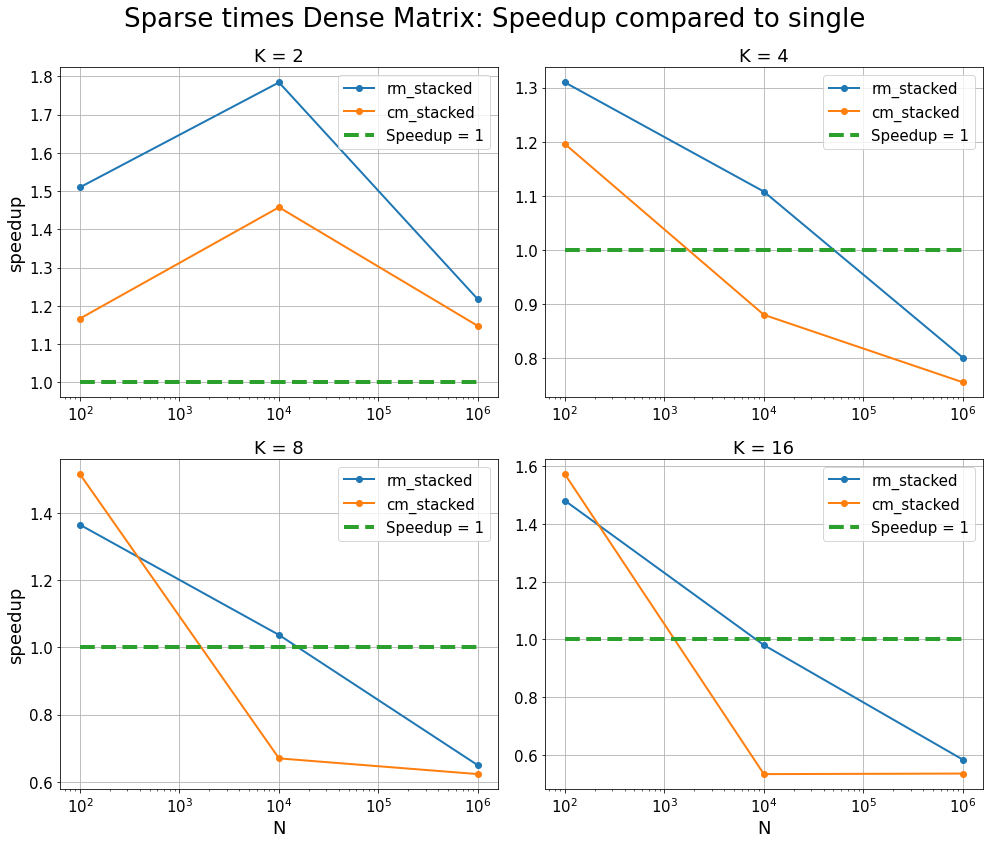

In [59]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,12))

logx, logy = True, False
if (logx and logy):
    plot_format = "loglog"
if (logx and not logy):
    plot_format = "logx"
if (not logx and logy):
    plot_format = "logy"
else:
    plot_format = "linear"

print_styling();
x = "N"
for k,ax in zip(df["K"].unique(), axs.ravel()):
    print(k)
    df[df["K"] == k].plot(x=x, y=speedup_cols, logx=logx, logy=logy, marker="o", linestyle="-", ax=ax)
    ax.plot(Ns, [1]*len(Ns), linestyle="--", linewidth=4)
    ax.legend(labels[1:]+["Speedup = 1"])
    ax.grid()
    ax.set_title(f"K = {k}")
    ax.set_xlabel("")

axs[0][0].set_ylabel("speedup")
axs[1][0].set_ylabel("speedup")
axs[1][0].set_xlabel("N")
axs[1][1].set_xlabel("N")
#df.plot(x=x, y=gpu_ref+["time_cpuref"], logx=logx, logy=logy, linestyle="--", ax=ax);



fig.suptitle("Sparse times Dense Matrix: Speedup compared to single")
plt.tight_layout()

fig.savefig("spTd_speedup.pdf", bbox_inches="tight", pad_inches=0.2)